In [1]:
%matplotlib inline

import tile
import main
import pandas
import geopandas
import matplotlib
import shapely.geometry

In [5]:
# While fiddling with the tile.py and main.py source use this to reload
import importlib
importlib.reload(tile)
importlib.reload(main)

<module 'main' from '/home/osullid3/Documents/code/tiling-space/main.py'>

## Test by generating multiple patterns
Enable the next code block to test

In [73]:
# main.main()

## Test model example
This makes 3.4.3.4.3 tiling

In [62]:
DUAL = False

BLUE = 0x477984
ORANGE = 0xEEAA4D
RED = 0xC03C44
GREEN = 0x33CC66
PURPLE = 0x6633CC

model = tile.Model(scale = 20, width = 512, height = 512)
model.append(tile.Shape(4))
a = model.add(0, range(4), 3)
b = model.add(a, 1, 4)
c = model.add(b, [2, 3], 3)
d = model.add(c, 2, 4)
model.repeat(d)
model.render(dual = DUAL).write_to_png("test.png")

In [40]:
model_dual = model.dual()

In [41]:
the_shapes = model.dual() if DUAL else model.lookup.values()

fills = [s.fill for s in the_shapes]
df = pandas.DataFrame(data = {"fill": fills})

geoms = [shapely.geometry.Polygon(s.points()) for s in the_shapes]
tiles = geopandas.GeoDataFrame(df, geometry = geoms)

<AxesSubplot:>

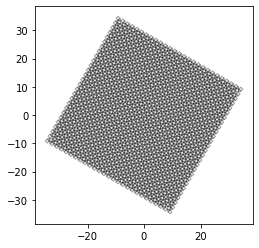

In [42]:
tiles.plot(facecolor = "#cccccc", edgecolor = 'k', alpha = 0.35)

In [43]:
tiles.to_file("tiles.gpkg", driver = "GPKG")